In [1]:
import pandas as pd

import statsmodels.api as sm
import pandas as pd
import datetime
from pathlib import Path

pd.set_option("display.max_columns", None)
# !pip install statsmodels


# %config InlineBackend.figure_format = "svg"
# %config InlineBackend.print_figure_kwargs = {"dpi" : 300}
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# from cadFace.vis import percentiles_plot
import sci_palettes

try:
    sci_palettes.register_cmap()
except:
    pass
import scienceplots
from pathlib import Path
import pandas as pd
from ppp_aging.ppp_model import *
from ppp_aging.model import generate_states_cols

plt.style.use(["nature", "no-latex"])
sns.set_context("paper", font_scale=1.5)
sns.set_palette("nejm")

In [2]:
age_bin_logit_subset_res = pd.read_csv("1.2_age_bin_logit_subset_res_df.csv")
age_bin_logit_subset_res

,var,exposure,model,pvalue,coef,std,z,upper,lower,AUC,ACC,Macro_F1,Sensitivity,Specificity,APR,pearsonr,spearmanr,explained_variance_score,r2_score,n_case,n_control,LOG10P,q_values,reject,markers,age_bin
0,C3,incident_cad,logit,0.692381,-0.118625,0.299843,-0.395625,-0.706306,0.469056,0.760579,0.632994,0.415175,0.819672,0.630552,0.057037,0.139886,0.106552,0.019148,0.019148,61.0,4255.0,0.159655,0.911547,False,NaN,0-45
1,KLK7,incident_cad,logit,0.055031,-0.656959,0.342411,-1.918629,-1.328071,0.014154,0.778075,0.643564,0.419285,0.830508,0.641223,0.054406,0.144049,0.111510,0.020253,0.020253,59.0,4284.0,1.259390,0.322326,False,NaN,0-45
2,GCHFR,incident_cad,logit,0.009397,0.428698,0.165057,2.597274,0.105192,0.752203,0.787912,0.677382,0.434531,0.816667,0.675669,0.056706,0.140848,0.116257,0.018698,0.018698,60.0,4295.0,2.027025,0.111648,False,NaN,0-45
3,NHLRC3,incident_cad,logit,0.010867,1.098606,0.431345,2.546931,0.253185,1.944026,0.775465,0.708544,0.444774,0.741379,0.708333,0.063692,0.155604,0.109399,0.023786,0.023786,58.0,4296.0,1.963871,0.121208,False,NaN,0-45
4,APOD,incident_cad,logit,0.149775,-0.635115,0.440952,-1.440328,-1.499364,0.229135,0.757426,0.670276,0.429050,0.750000,0.669393,0.059943,0.148347,0.104124,0.021811,0.021811,60.0,4280.0,0.824561,0.533000,False,NaN,0-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17461,VWF,incident_cad,logit,0.000789,0.169505,0.050497,3.356765,0.070534,0.268477,0.678024,0.665078,0.525274,0.596413,0.673123,0.202202,0.208160,0.187349,0.043244,0.043244,669.0,5834.0,3.103142,0.011478,True,NaN,65-70
17462,NOTCH3,incident_cad,logit,0.857202,0.019776,0.109904,0.179937,-0.195632,0.235184,0.673869,0.708750,0.545811,0.535127,0.728831,0.198623,0.202151,0.182977,0.040788,0.040788,669.0,5834.0,0.066917,0.973500,False,NaN,65-70
17463,CNTN1,incident_cad,logit,0.014017,-0.315366,0.128363,-2.456829,-0.566954,-0.063779,0.675840,0.674304,0.529807,0.584454,0.684779,0.199363,0.204244,0.185050,0.041648,0.041648,669.0,5834.0,1.853347,0.105362,False,NaN,65-70
17464,ENG,incident_cad,logit,0.404270,0.177044,0.212278,0.834019,-0.239014,0.593102,0.674355,0.704598,0.543902,0.541106,0.723517,0.197518,0.201917,0.183488,0.040704,0.040704,669.0,5834.0,0.393328,0.765172,False,NaN,65-70


In [5]:
def set_rank_df(df, group_by, rank_by, ascending=False):
    if "rank" in df.columns:
        df = df.drop(columns="rank")
    return (
        df.copy()
        .groupby(group_by)
        .apply(
            lambda x: x.sort_values(rank_by, ascending=ascending)
            .reset_index(drop=True)
            .reset_index(drop=False, names="rank")
        )
        .reset_index(drop=True)
        .sort_values("rank")
    )


age_bin_logit_subset_res = set_rank_df(
    age_bin_logit_subset_res, "age_bin", "LOG10P", ascending=True
)
age_bin_logit_subset_res

,rank,var,exposure,model,pvalue,coef,std,z,upper,lower,AUC,ACC,Macro_F1,Sensitivity,Specificity,APR,pearsonr,spearmanr,explained_variance_score,r2_score,n_case,n_control,LOG10P,q_values,reject,markers,age_bin
0,0,SCRN1,incident_cad,logit,9.995779e-01,0.000098,0.185281,0.000529,-0.363046,0.363242,0.767346,0.696238,0.440576,0.763889,0.695504,0.054194,0.135964,0.106780,0.017975,0.017975,72.0,5271.0,0.000183,9.995779e-01,False,NaN,0-45
5822,0,BCL7B,incident_cad,logit,9.998418e-01,0.000031,0.154040,0.000198,-0.301883,0.301944,0.736805,0.735846,0.497518,0.618357,0.740734,0.098861,0.170860,0.157683,0.029019,0.029019,207.0,5180.0,0.000069,9.998418e-01,False,NaN,50-55
11644,0,BMP6,incident_cad,logit,9.997942e-01,0.000024,0.092230,0.000258,-0.180743,0.180791,0.679765,0.571978,0.452994,0.710187,0.560970,0.157149,0.187896,0.163506,0.035274,0.035274,697.0,8660.0,0.000089,9.997942e-01,False,NaN,60-65
2911,0,GNPDA2,incident_cad,logit,9.999440e-01,0.000016,0.230635,0.000070,-0.452020,0.452053,0.781490,0.686604,0.465001,0.763780,0.684575,0.110907,0.209004,0.162116,0.043664,0.043664,127.0,4337.0,0.000024,9.999440e-01,False,NaN,45-50
14555,0,BOLA1,incident_cad,logit,9.998776e-01,-0.000013,0.085013,-0.000153,-0.166635,0.166609,0.670894,0.661061,0.518126,0.597353,0.668169,0.183432,0.191293,0.175819,0.036541,0.036541,529.0,4882.0,0.000053,9.998776e-01,False,NaN,65-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11643,2910,PLAUR,incident_cad,logit,1.647057e-15,1.159556,0.145574,7.965388,0.874236,1.444877,0.738326,0.730000,0.514050,0.625000,0.735769,0.147510,0.216216,0.181474,0.046685,0.046685,392.0,7308.0,14.783291,4.794582e-12,True,***,55-60
5821,2910,WFDC2,incident_cad,logit,4.968594e-07,0.782056,0.155555,5.027522,0.477174,1.086939,0.799429,0.795651,0.522065,0.675862,0.799461,0.113090,0.209309,0.174618,0.043338,0.043338,145.0,4822.0,6.303767,1.446358e-03,True,*,45-50
2910,2910,WFDC2,incident_cad,logit,3.812349e-12,1.380575,0.198816,6.943969,0.990902,1.770248,0.824824,0.831916,0.501546,0.707692,0.833734,0.077634,0.174443,0.126748,0.027718,0.027718,65.0,4992.0,11.418807,1.109775e-08,True,***,0-45
14554,2910,GDF15,incident_cad,logit,8.052727e-31,0.755171,0.065425,11.542524,0.626941,0.883402,0.719232,0.639582,0.493291,0.685596,0.635977,0.185018,0.229978,0.199704,0.052801,0.052801,722.0,8939.0,30.094057,2.344149e-27,True,***,60-65


<Axes: xlabel='var', ylabel='rank'>

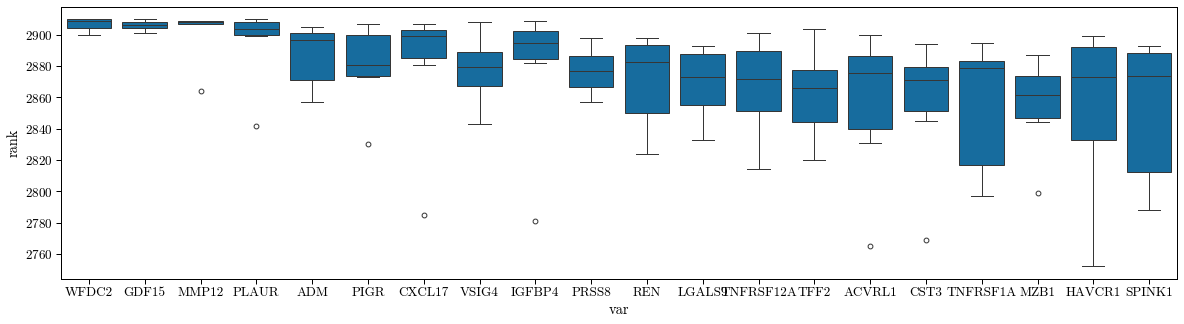

In [6]:
k = 20
plt_data = age_bin_logit_subset_res.copy()
mean_rank = (
    age_bin_logit_subset_res.groupby("var")
    .mean("rank")["rank"]
    .sort_values(ascending=False)
    .head(k)
    .index.tolist()
)

plt_data = plt_data[plt_data["var"].isin(mean_rank)]
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(data=plt_data, x="var", y="rank", ax=ax, order=mean_rank)
# ax.set_xticklabels("")

In [7]:
from scipy.stats import norm


def cal_stat(mean=None, std=None, z=None, return_LOG10P=True):
    if mean is not None and std is not None:
        z = (mean - 0) / std

    if return_LOG10P:
        return -np.log10((1 - norm.cdf(abs(z))) * 2)
    else:
        return (1 - norm.cdf(abs(z))) * 2

In [8]:
# age_bin_logit_subset_res["common_index"] = (
#     age_bin_logit_subset_res.groupby("var")
#     .apply(lambda x: x["rank"].mean() / x["rank"].std())
#     .sort_values(ascending=True)
# )
# age_bin_logit_subset_res


common_index = (
    age_bin_logit_subset_res.groupby("var")
    .apply(lambda x: x["rank"].mean() / x["rank"].std())
    .sort_values(ascending=True)
    .to_dict()
)
age_bin_logit_subset_res["common_index"] = age_bin_logit_subset_res["var"].map(
    common_index
)
age_bin_logit_subset_res

,rank,var,exposure,model,pvalue,coef,std,z,upper,lower,AUC,ACC,Macro_F1,Sensitivity,Specificity,APR,pearsonr,spearmanr,explained_variance_score,r2_score,n_case,n_control,LOG10P,q_values,reject,markers,age_bin,common_index
0,0,SCRN1,incident_cad,logit,9.995779e-01,0.000098,0.185281,0.000529,-0.363046,0.363242,0.767346,0.696238,0.440576,0.763889,0.695504,0.054194,0.135964,0.106780,0.017975,0.017975,72.0,5271.0,0.000183,9.995779e-01,False,NaN,0-45,1.734675
5822,0,BCL7B,incident_cad,logit,9.998418e-01,0.000031,0.154040,0.000198,-0.301883,0.301944,0.736805,0.735846,0.497518,0.618357,0.740734,0.098861,0.170860,0.157683,0.029019,0.029019,207.0,5180.0,0.000069,9.998418e-01,False,NaN,50-55,1.168992
11644,0,BMP6,incident_cad,logit,9.997942e-01,0.000024,0.092230,0.000258,-0.180743,0.180791,0.679765,0.571978,0.452994,0.710187,0.560970,0.157149,0.187896,0.163506,0.035274,0.035274,697.0,8660.0,0.000089,9.997942e-01,False,NaN,60-65,0.980297
2911,0,GNPDA2,incident_cad,logit,9.999440e-01,0.000016,0.230635,0.000070,-0.452020,0.452053,0.781490,0.686604,0.465001,0.763780,0.684575,0.110907,0.209004,0.162116,0.043664,0.043664,127.0,4337.0,0.000024,9.999440e-01,False,NaN,45-50,1.634049
14555,0,BOLA1,incident_cad,logit,9.998776e-01,-0.000013,0.085013,-0.000153,-0.166635,0.166609,0.670894,0.661061,0.518126,0.597353,0.668169,0.183432,0.191293,0.175819,0.036541,0.036541,529.0,4882.0,0.000053,9.998776e-01,False,NaN,65-70,1.049672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11643,2910,PLAUR,incident_cad,logit,1.647057e-15,1.159556,0.145574,7.965388,0.874236,1.444877,0.738326,0.730000,0.514050,0.625000,0.735769,0.147510,0.216216,0.181474,0.046685,0.046685,392.0,7308.0,14.783291,4.794582e-12,True,***,55-60,110.755937
5821,2910,WFDC2,incident_cad,logit,4.968594e-07,0.782056,0.155555,5.027522,0.477174,1.086939,0.799429,0.795651,0.522065,0.675862,0.799461,0.113090,0.209309,0.174618,0.043338,0.043338,145.0,4822.0,6.303767,1.446358e-03,True,*,45-50,674.610601
2910,2910,WFDC2,incident_cad,logit,3.812349e-12,1.380575,0.198816,6.943969,0.990902,1.770248,0.824824,0.831916,0.501546,0.707692,0.833734,0.077634,0.174443,0.126748,0.027718,0.027718,65.0,4992.0,11.418807,1.109775e-08,True,***,0-45,674.610601
14554,2910,GDF15,incident_cad,logit,8.052727e-31,0.755171,0.065425,11.542524,0.626941,0.883402,0.719232,0.639582,0.493291,0.685596,0.635977,0.185018,0.229978,0.199704,0.052801,0.052801,722.0,8939.0,30.094057,2.344149e-27,True,***,60-65,884.267640


In [9]:
# 假定每个蛋白内部的rank是正态分布的，计算每个蛋白在不同时间的P值


def convert_to_pvalue(data):
    p_values = []
    for value in data:
        z = (value - data.mean()) / data.std()  # 计算z-score
        p_value = 2 * (1 - norm.cdf(abs(z)))  # 计算双侧p-value
        p_values.append(p_value)
    return p_values


class NormDist:
    def __init__(self, mean=None, std=None):
        self.mean = mean
        self.std = std

    def fit(self, data):
        self.mean = data.mean()
        self.std = data.std()

    def transform(self, data, return_LOG10P=True):
        z = (data - self.mean) / self.std
        pvalue = 2 * (1 - norm.cdf(abs(z)))
        if return_LOG10P:
            return -np.log10(pvalue)
        else:
            return pvalue


def cal_specific_index(df, col="rank", new_col="specific_index", return_LOG10P=True):
    # for idx in df.index:

    #     data = df.loc[[i for i in df.index if i != idx], col]
    #     current_data = df.loc[idx, col]
    #     print(current_data, data.std())
    #     df.loc[idx, new_col] = current_data / data.std()
    std = df[col].std()
    mean = df[col].mean()
    # df[new_col] = (df[col] - mean) / std
    z = (df[col] - mean) / std
    if return_LOG10P:
        df[new_col] = -np.log10(2 * (1 - norm.cdf(abs(z))))
    else:
        df[new_col] = 2 * (1 - norm.cdf(abs(z)))

    return df


test = age_bin_logit_subset_res.groupby("var").apply(
    lambda x: cal_specific_index(x, col="rank", return_LOG10P=False)
)
test

/tmp/ipykernel_12205/1966884225.py:50: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  test = age_bin_logit_subset_res.groupby("var").apply(


,rank,var,exposure,model,pvalue,coef,std,z,upper,lower,AUC,ACC,Macro_F1,Sensitivity,Specificity,APR,pearsonr,spearmanr,explained_variance_score,r2_score,n_case,n_control,LOG10P,q_values,reject,markers,age_bin,common_index,specific_index
0,0,SCRN1,incident_cad,logit,9.995779e-01,0.000098,0.185281,0.000529,-0.363046,0.363242,0.767346,0.696238,0.440576,0.763889,0.695504,0.054194,0.135964,0.106780,0.017975,0.017975,72.0,5271.0,0.000183,9.995779e-01,False,NaN,0-45,1.734675,0.082798
5822,0,BCL7B,incident_cad,logit,9.998418e-01,0.000031,0.154040,0.000198,-0.301883,0.301944,0.736805,0.735846,0.497518,0.618357,0.740734,0.098861,0.170860,0.157683,0.029019,0.029019,207.0,5180.0,0.000069,9.998418e-01,False,NaN,50-55,1.168992,0.242407
11644,0,BMP6,incident_cad,logit,9.997942e-01,0.000024,0.092230,0.000258,-0.180743,0.180791,0.679765,0.571978,0.452994,0.710187,0.560970,0.157149,0.187896,0.163506,0.035274,0.035274,697.0,8660.0,0.000089,9.997942e-01,False,NaN,60-65,0.980297,0.326940
2911,0,GNPDA2,incident_cad,logit,9.999440e-01,0.000016,0.230635,0.000070,-0.452020,0.452053,0.781490,0.686604,0.465001,0.763780,0.684575,0.110907,0.209004,0.162116,0.043664,0.043664,127.0,4337.0,0.000024,9.999440e-01,False,NaN,45-50,1.634049,0.102249
14555,0,BOLA1,incident_cad,logit,9.998776e-01,-0.000013,0.085013,-0.000153,-0.166635,0.166609,0.670894,0.661061,0.518126,0.597353,0.668169,0.183432,0.191293,0.175819,0.036541,0.036541,529.0,4882.0,0.000053,9.998776e-01,False,NaN,65-70,1.049672,0.293869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11643,2910,PLAUR,incident_cad,logit,1.647057e-15,1.159556,0.145574,7.965388,0.874236,1.444877,0.738326,0.730000,0.514050,0.625000,0.735769,0.147510,0.216216,0.181474,0.046685,0.046685,392.0,7308.0,14.783291,4.794582e-12,True,***,55-60,110.755937,0.557415
5821,2910,WFDC2,incident_cad,logit,4.968594e-07,0.782056,0.155555,5.027522,0.477174,1.086939,0.799429,0.795651,0.522065,0.675862,0.799461,0.113090,0.209309,0.174618,0.043338,0.043338,145.0,4822.0,6.303767,1.446358e-03,True,*,45-50,674.610601,0.462393
2910,2910,WFDC2,incident_cad,logit,3.812349e-12,1.380575,0.198816,6.943969,0.990902,1.770248,0.824824,0.831916,0.501546,0.707692,0.833734,0.077634,0.174443,0.126748,0.027718,0.027718,65.0,4992.0,11.418807,1.109775e-08,True,***,0-45,674.610601,0.462393
14554,2910,GDF15,incident_cad,logit,8.052727e-31,0.755171,0.065425,11.542524,0.626941,0.883402,0.719232,0.639582,0.493291,0.685596,0.635977,0.185018,0.229978,0.199704,0.052801,0.052801,722.0,8939.0,30.094057,2.344149e-27,True,***,60-65,884.267640,0.223543


In [10]:
test["age_bin"] = pd.Categorical(
    test["age_bin"],
    categories=["0-45", "45-50", "50-55", "55-60", "60-65", "65-70"],
    ordered=True,
)

<Axes: xlabel='age_bin', ylabel='rank'>

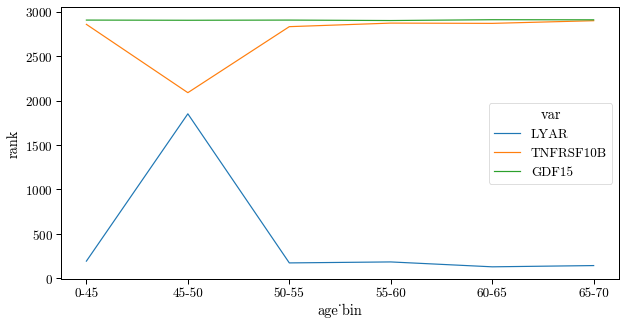

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))
select_list = [
    "GDF15",
    "LYAR",
    "TNFRSF10B",
]
sns.lineplot(
    test[test["var"].isin(select_list)],
    x="age_bin",
    y="rank",
    hue="var",
    ax=ax,
    palette="tab10",
)

In [193]:
test.groupby("age_bin").apply(lambda x: (x["specific_index"] < 0.05).sum())

age_bin
0-45     26
45-50    64
50-55     7
55-60     7
60-65     5
65-70     8
dtype: int64

In [11]:
age_bin_specific_proteins = (
    test.groupby("age_bin")
    .apply(lambda x: x[x["specific_index"] < 0.05]["var"].tolist())
    .to_dict()
)
age_bin_specific_proteins

{'0-45': ['GDNF',
  'ANGPTL4',
  'CBS',
  'BPIFB2',
  'CFI',
  'CXCL10',
  'MSTN',
  'FLT3LG',
  'SPON1',
  'CD38',
  'CCL22',
  'RAB6A',
  'ERC2',
  'CSTB',
  'EDN1',
  'SMOC2',
  'MRPL52',
  'COL18A1',
  'CHEK2',
  'NTproBNP',
  'ADRA2A',
  'SIGLEC9',
  'EDA2R',
  'LGALS4',
  'TIMP1',
  'MMP12'],
 '45-50': ['SEMA3F',
  'SIGLEC10',
  'TYRP1',
  'TNFRSF13B',
  'TGFB1',
  'SCG2',
  'NHLRC3',
  'IL16',
  'PLXNB2',
  'LBP',
  'LRIG1',
  'TNFRSF19',
  'FSTL1',
  'TNFRSF11A',
  'CEACAM6',
  'TNF',
  'MYOC',
  'IL17C',
  'CKAP4',
  'SLAMF8',
  'ADAMTSL2',
  'VWA1',
  'PTPRN2',
  'LAYN',
  'TNFSF13',
  'HLA-E',
  'TNFRSF4',
  'HNMT',
  'EFEMP1',
  'THBS2',
  'CD300C',
  'ATP6V1F',
  'SCARA5',
  'LILRB4',
  'FABP3',
  'TNFRSF9',
  'VSIG2',
  'CD99L2',
  'LTBP3',
  'MMP10',
  'TSPAN15',
  'LYAR',
  'SORCS2',
  'PVALB',
  'MMP7',
  'SCARB2',
  'RNASE1',
  'TNFRSF10B',
  'LSM1',
  'VWC2',
  'FURIN',
  'C3',
  'LAIR1',
  'ASGR1',
  'CHI3L1',
  'COLEC12',
  'METAP2',
  'FSTL3',
  'EFNA4',
  'VSTM2B

In [12]:
age_bin_specific_proteins = (
    test.groupby("age_bin")
    .apply(lambda x: x[x["specific_index"] < 0.05]["var"].tolist())
    .to_dict()
)
age_bin_specific_proteins

{'0-45': ['GDNF',
  'ANGPTL4',
  'CBS',
  'BPIFB2',
  'CFI',
  'CXCL10',
  'MSTN',
  'FLT3LG',
  'SPON1',
  'CD38',
  'CCL22',
  'RAB6A',
  'ERC2',
  'CSTB',
  'EDN1',
  'SMOC2',
  'MRPL52',
  'COL18A1',
  'CHEK2',
  'NTproBNP',
  'ADRA2A',
  'SIGLEC9',
  'EDA2R',
  'LGALS4',
  'TIMP1',
  'MMP12'],
 '45-50': ['SEMA3F',
  'SIGLEC10',
  'TYRP1',
  'TNFRSF13B',
  'TGFB1',
  'SCG2',
  'NHLRC3',
  'IL16',
  'PLXNB2',
  'LBP',
  'LRIG1',
  'TNFRSF19',
  'FSTL1',
  'TNFRSF11A',
  'CEACAM6',
  'TNF',
  'MYOC',
  'IL17C',
  'CKAP4',
  'SLAMF8',
  'ADAMTSL2',
  'VWA1',
  'PTPRN2',
  'LAYN',
  'TNFSF13',
  'HLA-E',
  'TNFRSF4',
  'HNMT',
  'EFEMP1',
  'THBS2',
  'CD300C',
  'ATP6V1F',
  'SCARA5',
  'LILRB4',
  'FABP3',
  'TNFRSF9',
  'VSIG2',
  'CD99L2',
  'LTBP3',
  'MMP10',
  'TSPAN15',
  'LYAR',
  'SORCS2',
  'PVALB',
  'MMP7',
  'SCARB2',
  'RNASE1',
  'TNFRSF10B',
  'LSM1',
  'VWC2',
  'FURIN',
  'C3',
  'LAIR1',
  'ASGR1',
  'CHI3L1',
  'COLEC12',
  'METAP2',
  'FSTL3',
  'EFNA4',
  'VSTM2B

In [15]:
# common_index
# only take the top 10

age_bin_common_proteins = (
    test.groupby("age_bin")
    .apply(
        lambda x: x.sort_values("common_index", ascending=False)
        .head(10)["var"]
        .tolist()
    )
    .to_dict()
)
age_bin_common_proteins

{'0-45': ['GDF15',
  'WFDC2',
  'PRSS8',
  'MMP12',
  'ADM',
  'VSIG4',
  'RNASE6',
  'LGALS9',
  'PLAUR',
  'PIGR'],
 '45-50': ['GDF15',
  'WFDC2',
  'PRSS8',
  'MMP12',
  'ADM',
  'VSIG4',
  'RNASE6',
  'LGALS9',
  'PLAUR',
  'PIGR'],
 '50-55': ['GDF15',
  'WFDC2',
  'PRSS8',
  'MMP12',
  'ADM',
  'VSIG4',
  'RNASE6',
  'LGALS9',
  'PLAUR',
  'PIGR'],
 '55-60': ['GDF15',
  'WFDC2',
  'PRSS8',
  'MMP12',
  'ADM',
  'VSIG4',
  'RNASE6',
  'LGALS9',
  'PLAUR',
  'PIGR'],
 '60-65': ['GDF15',
  'WFDC2',
  'PRSS8',
  'MMP12',
  'ADM',
  'VSIG4',
  'RNASE6',
  'LGALS9',
  'PLAUR',
  'PIGR'],
 '65-70': ['GDF15',
  'WFDC2',
  'PRSS8',
  'MMP12',
  'ADM',
  'VSIG4',
  'RNASE6',
  'LGALS9',
  'PLAUR',
  'PIGR']}

In [14]:
age_bin_protein_subset = {}
for k in age_bin_logit_subset_res["age_bin"].unique():
    age_bin_protein_subset[k] = (
        age_bin_common_proteins[k] + age_bin_specific_proteins[k]
    )
    print(f"{k} have {len(age_bin_protein_subset[k])} proteins")

for k in age_bin_logit_subset_res["age_bin"].unique():
    # k = k +
    new_k = k + " + specific"
    age_bin_protein_subset[new_k] = age_bin_specific_proteins[k]
    print(f"{new_k} have {len(age_bin_protein_subset[new_k])} proteins")

0-45 have 36 proteins
50-55 have 17 proteins
60-65 have 15 proteins
45-50 have 74 proteins
65-70 have 18 proteins
55-60 have 17 proteins
0-45 + specific have 26 proteins
50-55 + specific have 7 proteins
60-65 + specific have 5 proteins
45-50 + specific have 64 proteins
65-70 + specific have 8 proteins
55-60 + specific have 7 proteins


In [24]:
risk_factors = [
    "age",
    "sex",
    "ldl_a",
    "hdl_a",
    "tc_a",
    "tg_a",
    "apob",
    "sbp_a",
    "dbp_a",
]

E = "incident_cad"
T = "future_cad_time_months"

In [25]:
from collections import OrderedDict

age_specific_combination_all = OrderedDict()
for k, v in age_bin_protein_subset.items():
    age_specific_combination_all[f"{k}"] = v
    age_specific_combination_all[f"{k} + RF"] = v + risk_factors
    age_specific_combination_all[f"{k} + RF + PRS"] = v + risk_factors + ["PRS"]
age_specific_combination_all

OrderedDict([('0-45',
              ['GDF15',
               'WFDC2',
               'PRSS8',
               'MMP12',
               'ADM',
               'VSIG4',
               'RNASE6',
               'LGALS9',
               'PLAUR',
               'PIGR',
               'GDNF',
               'ANGPTL4',
               'CBS',
               'BPIFB2',
               'CFI',
               'CXCL10',
               'MSTN',
               'FLT3LG',
               'SPON1',
               'CD38',
               'CCL22',
               'RAB6A',
               'ERC2',
               'CSTB',
               'EDN1',
               'SMOC2',
               'MRPL52',
               'COL18A1',
               'CHEK2',
               'NTproBNP',
               'ADRA2A',
               'SIGLEC9',
               'EDA2R',
               'LGALS4',
               'TIMP1',
               'MMP12']),
             ('0-45 + RF',
              ['GDF15',
               'WFDC2',
               'PRSS8',
         

## fit best model 

In [253]:
from cuml import LogisticRegression, Lasso, Ridge, ElasticNet

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, make_scorer
import numpy as np


def fit_best_model(train_df, test_df, X_var, y_var, method_list=None, cv=10, verbose=1):
    models_params = {
        "Logistic": {
            "model": LogisticRegression(
                solver="qn", random_state=42, class_weight="balanced"
            ),
            "param_grid": {
                "C": np.logspace(-4, 4, 10),  # C参数的范围，使用对数间隔
                "penalty": ["l1", "l2"],  # 正则化类型
            },
        },
        "Lasso": {
            "model": Lasso(),
            "param_grid": {
                "alpha": np.logspace(-4, 4, 10),
            },
        },
        "ElasticNet": {
            "model": ElasticNet(),
            "param_grid": {
                "alpha": np.logspace(-4, 4, 10),
                "l1_ratio": np.linspace(0, 1, 10),
            },
        },
        # "RandomForest": {
        #     "model": RandomForestClassifier(),
        #     "param_grid": {"n_estimators": range(10, 101, 10)},
        # },
    }
    if method_list is not None:
        models_params = {k: v for k, v in models_params.items() if k in method_list}

    train_df = train_df[[y_var] + X_var].copy().dropna()
    test_df = test_df[[y_var] + X_var].copy().dropna()
    train_df[y_var] = train_df[y_var].astype(int)
    test_df[y_var] = test_df[y_var].astype(int)

    train_df, val_df = train_test_split(train_df, test_size=0.1, random_state=42)

    X_train = train_df[X_var]
    y_train = train_df[y_var]
    X_val = val_df[X_var]
    y_val = val_df[y_var]

    X_test = test_df[X_var]
    y_test = test_df[y_var]
    print(
        f"train shape: {X_train.shape}, val shape is {X_val.shape}, test shape is {X_test.shape}"
    )
    best_models = []

    for model_name, mp in models_params.items():
        # if model_name == "RandomForest":
        #     best_model = RandomForestClassifier(verbose=verbose)
        #     best_model.fit(X_train.values, y_train.values)
        #     auc = roc_auc_score(y_val, best_model.predict(X_val.values))
        #     bset_params = None  # no params for RandomForest

        # else:
        if model_name == "Logistic":
            scorer = make_scorer(roc_auc_score, needs_proba=True)
        else:
            scorer = make_scorer(roc_auc_score)

        grid_search = GridSearchCV(
            mp["model"], mp["param_grid"], scoring=scorer, cv=cv, verbose=verbose
        )
        grid_search.fit(X_train.values, y_train.values)

        best_model = grid_search.best_estimator_
        bset_params = grid_search.best_params_

        if model_name == "Logistic":
            auc = roc_auc_score(y_val, best_model.predict_proba(X_val.values)[:, 1])
        else:
            auc = roc_auc_score(y_val, best_model.predict(X_val.values))
        print(f"model: {model_name}\tBest parameters: {bset_params}, with auc: {auc}")
        best_models.append((model_name, best_model, grid_search, auc))

    ## select the currently best
    # print(best_models)

    # 还原原始的train_df
    train_df = pd.concat([train_df, val_df], axis=0)
    X_train = train_df[X_var]
    y_train = train_df[y_var]

    best_mdoels = list(sorted(best_models, key=lambda x: x[-1], reverse=True))
    best_model_name, best_model, *_ = best_mdoels[0]

    if best_model_name == "Logistic":
        train_pred = best_model.predict_proba(X_train.values)[:, 1]

        test_pred = best_model.predict_proba(X_test.values)[:, 1]
    else:
        train_pred = best_model.predict(X_train.values)
        val_pred = best_model.predict(X_val.values)
        test_pred = best_model.predict(X_test.values)

    train_df[f"{y_var}_pred"] = train_pred

    test_df[f"{y_var}_pred"] = test_pred

    train_auc = roc_auc_score(y_train, train_pred)
    test_auc = roc_auc_score(y_test, test_pred)

    train_metrics = {
        "train_auc": train_auc,
    }
    test_metrics = {
        "test_auc": test_auc,
    }
    return best_model, train_metrics, test_metrics, train_df, test_df, best_mdoels

In [254]:
train_imputed = pd.read_pickle("1_train_imputed.pkl")
test_imputed = pd.read_pickle("1_test_imputed.pkl").dropna(
    subset=["PRS"] + risk_factors
)


print(
    f"train_imputed shape is {train_imputed.shape}, test_imputed shape is {test_imputed.shape}"
)
print(
    f"train have {E}: {train_imputed[E].value_counts()}; test have {E}: {test_imputed[E].value_counts()}"
)

train_imputed shape is (40806, 2966), test_imputed shape is (8298, 2966)
train have incident_cad: 0.0    38544
1.0     2262
Name: incident_cad, dtype: int64; test have incident_cad: 0.0    7859
1.0     439
Name: incident_cad, dtype: int64


In [256]:
from collections import defaultdict
import pickle
from pathlib import Path

Regression_model_result_dict = defaultdict(dict)
output = "./1_regression_models/age_specific/"
Path(output).mkdir(exist_ok=True)

In [257]:
print(len(age_specific_combination_all))

36


In [259]:
# %%time
import numpy as np

methods = ["Lasso", "ElasticNet", "Logistic"]
cv = 10
for k, combination in age_specific_combination_all.items():
    if Path(f"{output}/{k}.pkl").exists():
        print(f"{k} already exists")
        continue
    print(f"start to fit {k} fiting")

    (
        model,
        train_metrics,
        test_metrics,
        train_imputed_data,
        test_imputed_data,
        best_models,
    ) = fit_best_model(
        train_df=train_imputed,
        test_df=test_imputed,
        X_var=age_specific_combination_all[k],
        y_var=E,
        method_list=methods,
        cv=cv,
    )
    print(
        f"{k} train auc: {train_metrics['train_auc']}, test auc: {test_metrics['test_auc']}"
    )
    all_obj = {
        "model": model,
        "train_metrics": train_metrics,
        "test_metrics": test_metrics,
        "train_data": train_imputed_data,
        "test_data": test_imputed_data,
        "best_models": best_models,
    }
    pickle.dump(all_obj, open(f"{output}/{k}.pkl", "wb"))
    Regression_model_result_dict[k] = all_obj

[W] [19:16:39.353837] L-BFGS: max iterations reached
[W] [19:16:39.354243] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [19:16:44.975681] L-BFGS: max iterations reached
[W] [19:16:44.976362] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [19:16:50.627294] L-BFGS: max iterations reached
[W] [19:16:50.628717] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [19:16:56.174242] L-BFGS: max iterations reached
[W] [19:16:56.174676] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the inpu

/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


[W] [19:23:46.076553] L-BFGS: max iterations reached
[W] [19:23:46.076725] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [19:23:49.731295] L-BFGS: max iterations reached
[W] [19:23:49.731702] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [19:23:53.175524] L-BFGS: max iterations reached
[W] [19:23:53.175972] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [19:23:56.729785] L-BFGS: max iterations reached
[W] [19:23:56.730148] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the inpu

/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


[W] [19:33:36.630880] L-BFGS: max iterations reached
[W] [19:33:36.631069] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [19:33:56.495483] L-BFGS: max iterations reached
[W] [19:33:56.495656] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [19:34:18.196034] L-BFGS: max iterations reached
[W] [19:34:18.196203] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [19:34:21.232717] L-BFGS: max iterations reached
[W] [19:34:21.233092] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the inpu

/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


[W] [19:51:08.814678] L-BFGS: max iterations reached
[W] [19:51:08.815345] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [19:51:12.816766] L-BFGS: max iterations reached
[W] [19:51:12.817322] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [19:51:16.635749] L-BFGS: max iterations reached
[W] [19:51:16.636594] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [19:51:25.016224] L-BFGS: max iterations reached
[W] [19:51:25.016380] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the inpu

/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


[W] [19:59:46.404322] L-BFGS: max iterations reached
[W] [19:59:46.404498] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [19:59:49.435805] L-BFGS: max iterations reached
[W] [19:59:49.436487] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [19:59:54.762043] L-BFGS: max iterations reached
[W] [19:59:54.762215] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [19:59:57.832772] L-BFGS: max iterations reached
[W] [19:59:57.833175] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the inpu

/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


[W] [20:08:27.034579] L-BFGS: max iterations reached
[W] [20:08:27.034776] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [20:08:46.649320] L-BFGS: max iterations reached
[W] [20:08:46.649608] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [20:08:49.741196] L-BFGS: max iterations reached
[W] [20:08:49.741571] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [20:08:52.850536] L-BFGS: max iterations reached
[W] [20:08:52.850918] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the inpu

/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


[W] [20:24:39.028851] L-BFGS: max iterations reached
[W] [20:24:39.029136] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [20:24:50.853439] L-BFGS: max iterations reached
[W] [20:24:50.853845] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [20:25:03.725457] L-BFGS: max iterations reached
[W] [20:25:03.725859] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [20:25:06.552991] L-BFGS: max iterations reached
[W] [20:25:06.553353] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the inpu

/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


[W] [20:36:15.536205] L-BFGS: max iterations reached
[W] [20:36:15.536812] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [20:36:18.494091] L-BFGS: max iterations reached
[W] [20:36:18.494460] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [20:36:21.355179] L-BFGS: max iterations reached
[W] [20:36:21.355603] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [20:36:24.135831] L-BFGS: max iterations reached
[W] [20:36:24.136379] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the inpu

/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


[W] [20:44:45.805460] L-BFGS: max iterations reached
[W] [20:44:45.805608] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [20:44:48.779303] L-BFGS: max iterations reached
[W] [20:44:48.779662] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [20:44:51.744053] L-BFGS: max iterations reached
[W] [20:44:51.744399] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [20:44:59.783588] L-BFGS: max iterations reached
[W] [20:44:59.783745] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the inpu

/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


[W] [20:52:56.026988] L-BFGS: max iterations reached
[W] [20:52:56.027269] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [20:53:19.453942] L-BFGS: max iterations reached
[W] [20:53:19.454110] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [20:53:22.241935] L-BFGS: max iterations reached
[W] [20:53:22.242488] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [20:53:25.304752] L-BFGS: max iterations reached
[W] [20:53:25.305104] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the inpu

/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


[W] [21:00:57.442367] L-BFGS: max iterations reached
[W] [21:00:57.442529] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [21:01:29.249144] L-BFGS: max iterations reached
[W] [21:01:29.249320] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [21:01:32.045420] L-BFGS: max iterations reached
[W] [21:01:32.045854] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [21:01:35.100692] L-BFGS: max iterations reached
[W] [21:01:35.101325] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the inpu

/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


[W] [21:09:34.321783] L-BFGS: max iterations reached
[W] [21:09:34.322028] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [21:09:37.347174] L-BFGS: max iterations reached
[W] [21:09:37.347533] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [21:10:01.881469] L-BFGS: max iterations reached
[W] [21:10:01.881764] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [21:10:04.695409] L-BFGS: max iterations reached
[W] [21:10:04.695796] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the inpu

/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


[W] [21:18:26.825913] L-BFGS: max iterations reached
[W] [21:18:26.826104] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [21:18:29.821474] L-BFGS: max iterations reached
[W] [21:18:29.821965] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [21:18:32.620650] L-BFGS: max iterations reached
[W] [21:18:32.621007] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [21:18:35.666399] L-BFGS: max iterations reached
[W] [21:18:35.666752] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the inpu

/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


[W] [21:27:11.221699] L-BFGS: max iterations reached
[W] [21:27:11.221913] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [21:27:19.428027] L-BFGS: max iterations reached
[W] [21:27:19.428314] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [21:27:24.787924] L-BFGS: max iterations reached
[W] [21:27:24.788140] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [21:27:29.987317] L-BFGS: max iterations reached
[W] [21:27:29.987604] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the inpu

/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


[W] [21:35:03.450032] L-BFGS: max iterations reached
[W] [21:35:03.450208] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [21:35:06.421064] L-BFGS: max iterations reached
[W] [21:35:06.421448] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [21:35:09.637170] L-BFGS: max iterations reached
[W] [21:35:09.637528] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [21:35:15.719251] L-BFGS: max iterations reached
[W] [21:35:15.719406] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the inpu

/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


[W] [21:43:03.904920] L-BFGS: max iterations reached
[W] [21:43:03.905240] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [21:43:06.854040] L-BFGS: max iterations reached
[W] [21:43:06.854442] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [21:43:15.132675] L-BFGS: max iterations reached
[W] [21:43:15.133043] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [21:43:20.670544] L-BFGS: max iterations reached
[W] [21:43:20.670699] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the inpu

/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


[W] [21:50:05.232737] L-BFGS: max iterations reached
[W] [21:50:05.232921] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [21:50:48.185146] L-BFGS: max iterations reached
[W] [21:50:48.185437] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [21:50:56.119348] L-BFGS: max iterations reached
[W] [21:50:56.119513] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [21:50:59.130667] L-BFGS: max iterations reached
[W] [21:50:59.131030] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the inpu

/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


[W] [21:58:30.972441] L-BFGS: max iterations reached
[W] [21:58:30.972601] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [21:58:33.913028] L-BFGS: max iterations reached
[W] [21:58:33.913469] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [21:58:37.422240] L-BFGS: max iterations reached
[W] [21:58:37.422635] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [21:58:40.960092] L-BFGS: max iterations reached
[W] [21:58:40.960453] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the inpu

/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


[W] [22:08:41.705420] L-BFGS: max iterations reached
[W] [22:08:41.705579] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [22:09:06.377245] L-BFGS: max iterations reached
[W] [22:09:06.377406] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [22:09:09.307663] L-BFGS: max iterations reached
[W] [22:09:09.308025] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [22:09:12.998257] L-BFGS: max iterations reached
[W] [22:09:12.998662] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the inpu

/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


[W] [22:19:48.321888] L-BFGS: max iterations reached
[W] [22:19:48.322360] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [22:19:51.372688] L-BFGS: max iterations reached
[W] [22:19:51.373058] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [22:19:54.486480] L-BFGS: max iterations reached
[W] [22:19:54.486868] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [22:19:57.621344] L-BFGS: max iterations reached
[W] [22:19:57.621738] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the inpu

/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


[W] [22:27:52.937590] L-BFGS: max iterations reached
[W] [22:27:52.937759] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [22:27:56.021183] L-BFGS: max iterations reached
[W] [22:27:56.021631] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [22:28:01.996270] L-BFGS: max iterations reached
[W] [22:28:01.996429] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [22:28:08.083143] L-BFGS: max iterations reached
[W] [22:28:08.083496] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the inpu

/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


[W] [22:35:59.272222] L-BFGS: max iterations reached
[W] [22:35:59.272531] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [22:36:09.424862] L-BFGS: max iterations reached
[W] [22:36:09.425315] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [22:36:12.301318] L-BFGS: max iterations reached
[W] [22:36:12.301748] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [22:36:15.261520] L-BFGS: max iterations reached
[W] [22:36:15.261885] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the inpu

/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


[W] [22:43:47.312359] L-BFGS: max iterations reached
[W] [22:43:47.312775] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [22:43:50.364960] L-BFGS: max iterations reached
[W] [22:43:50.365390] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [22:43:53.572254] L-BFGS: max iterations reached
[W] [22:43:53.572628] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
[W] [22:43:56.868647] L-BFGS: max iterations reached
[W] [22:43:56.869293] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the inpu

## vis

In [28]:
model_obj = {
    Path(i.name).stem: pd.read_pickle(str(i))
    for i in Path("./1_regression_models/age_specific").glob("*.pkl")
}
print(f"found {len(model_obj)} models")
model_obj

found 36 models


{'45-50': {'model': LogisticRegression(),
  'train_metrics': {'train_auc': 0.7629292222761755},
  'test_metrics': {'test_auc': 0.7381772301738413},
  'train_data':        incident_cad    GDF15     WFDC2     PRSS8   MMP12      ADM   VSIG4  \
  39998             0  0.44405 -0.361500  1.610150  0.0462 -0.02240 -0.1271   
  4384              0  1.12345 -0.127100 -0.239750 -0.2238  0.65580  0.6577   
  33529             0 -0.00435  0.594200  0.027850  0.6441  0.13700 -0.0843   
  6043              0 -0.03005 -0.433200  0.031314 -0.2150  0.51735  0.1004   
  39870             0  0.96235 -0.084400  0.920650 -0.3030  0.01530  0.2987   
  ...             ...      ...       ...       ...     ...      ...     ...   
  29173             0  0.26055  0.302000  0.003550  0.6818 -0.03470  0.3338   
  32203             0 -0.14345 -0.100800 -0.447350 -0.6298 -0.37900  0.2469   
  30198             0  0.11645  0.310500 -0.083850  0.5400  0.46300 -0.0187   
  5288              0  0.43045  0.073641  0.7185

In [32]:
test_auc = {k: [v["test_metrics"]["test_auc"]] for k, v in model_obj.items()}
test_auc

{'45-50': [0.7381772301738413],
 '60-65 + specific + RF': [0.7448158764047778],
 '60-65 + RF': [0.7698281876385649],
 '45-50 + specific + RF': [0.7665952388060523],
 '65-70 + RF': [0.7684893862527503],
 '65-70 + RF + PRS': [0.7812565487213273],
 '55-60 + specific + RF': [0.7539457540518378],
 '0-45': [0.7400287701722357],
 '55-60': [0.726456413884695],
 '60-65 + specific + RF + PRS': [0.7629576641379484],
 '0-45 + specific + RF + PRS': [0.7799826729710231],
 '55-60 + specific': [0.6694319963386579],
 '50-55 + specific': [0.674679958644689],
 '0-45 + specific': [0.7235715708032896],
 '55-60 + RF': [0.7726495543173952],
 '0-45 + RF': [0.7722782608393203],
 '60-65 + specific': [0.5088648129431572],
 '55-60 + specific + RF + PRS': [0.77018846694633],
 '0-45 + RF + PRS': [0.7858827900980291],
 '45-50 + specific': [0.7089485206375118],
 '50-55 + RF + PRS': [0.7868543558579879],
 '45-50 + specific + RF + PRS': [0.7802217964053805],
 '65-70': [0.7210249786890297],
 '50-55 + specific + RF + PRS

In [37]:
pd.DataFrame(test_auc).T.sort_values(0, ascending=False)

,0
50-55 + RF + PRS,0.786854
45-50 + RF + PRS,0.786259
0-45 + RF + PRS,0.785883
55-60 + RF + PRS,0.785791
60-65 + RF + PRS,0.784221
65-70 + RF + PRS,0.781257
45-50 + specific + RF + PRS,0.780222
0-45 + specific + RF + PRS,0.779983
50-55 + specific + RF + PRS,0.774587
45-50 + RF,0.774454


In [29]:

%%time
from ppp_aging.model import cal_binary_metrics_bootstrap

# method = "LR"
metrics_result = {}
for method in model_obj.keys():

    model = model_obj[method]["model"]

    if hasattr(model, "predict_proba"):
        pred_res = model.predict_proba(test_imputed[age_bin_protein_subset[method]]).iloc[:, 1]
    else:
        pred_res = model.predict(test_imputed[age_bin_protein_subset[method]].values)

    y_true = test_imputed["incident_cad"]
    metrics_result[method] = cal_binary_metrics_bootstrap(
        y_true, pred_res, ci_kwargs={"n_resamples": 100}
    )



NameError: name 'test_imputed' is not defined

In [272]:
model.coef_.shape

(1, 76)

In [277]:
len(set(age_specific_combination_all[method]))

73

In [278]:
age_specific_combination_all

OrderedDict([('0-45',
              ['GDF15',
               'WFDC2',
               'PRSS8',
               'MMP12',
               'ADM',
               'VSIG4',
               'RNASE6',
               'LGALS9',
               'PLAUR',
               'PIGR',
               'GDNF',
               'ANGPTL4',
               'CBS',
               'BPIFB2',
               'CFI',
               'CXCL10',
               'MSTN',
               'FLT3LG',
               'SPON1',
               'CD38',
               'CCL22',
               'RAB6A',
               'ERC2',
               'CSTB',
               'EDN1',
               'SMOC2',
               'MRPL52',
               'COL18A1',
               'CHEK2',
               'NTproBNP',
               'ADRA2A',
               'SIGLEC9',
               'EDA2R',
               'LGALS4',
               'TIMP1',
               'MMP12']),
             ('0-45 + RF',
              ['GDF15',
               'WFDC2',
               'PRSS8',
         